# 6.6 Analyzing Time-series Data
## Script Content
#### 01 importing libraries
#### 02 importing data sets
#### 03 Subsetting, wrangling, and cleaning time-series data
#### 04 Time series analysis: decomposition
#### 05 Testing for stationarity
#### 06 Check for autocorrelations

## 01 importing libraries

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

## 02 importing data sets

In [35]:
df = pd.read_csv(r"C:\Users\pshan\Downloads\part 6\Data\Produced Data set\world_happiness.csv")

In [31]:
# printing the data (head and tail)
df

,country,happiness_rank,happiness_score,economy_(gdp_per_capita),family,health_(life_expectancy),freedom,trust_(government_corruption),generosity,year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015
...,...,...,...,...,...,...,...,...,...,...
777,Rwanda,152,3.334,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700,2019
778,Tanzania,153,3.231,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600,2019
779,Afghanistan,154,3.203,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800,2019
780,Central African Republic,155,3.083,0.02600,0.00000,0.10500,0.22500,0.03500,0.23500,2019


In [51]:
# shape of data 
df.shape

(782, 10)

In [32]:
df.columns

Index(['country', 'happiness_rank', 'happiness_score',
       'economy_(gdp_per_capita)', 'family', 'health_(life_expectancy)',
       'freedom', 'trust_(government_corruption)', 'generosity', 'year'],
      dtype='object')

## 03 Subsetting, wrangling time-series data

In [36]:
# creating a new df for single country analysis like Germnay
df_country = df[df['country'] == 'Germany'] 

In [37]:
# Subset to relevant columns
relevant_columns = [ 'happiness_score', 'year']
df_country = df_country[relevant_columns]

In [38]:
df_country

,happiness_score,year
25,6.750,2015
173,6.994,2016
330,6.951,2017
484,6.965,2018
642,6.985,2019


In [39]:
# Setting the time index
df_country.set_index('year', inplace=True)

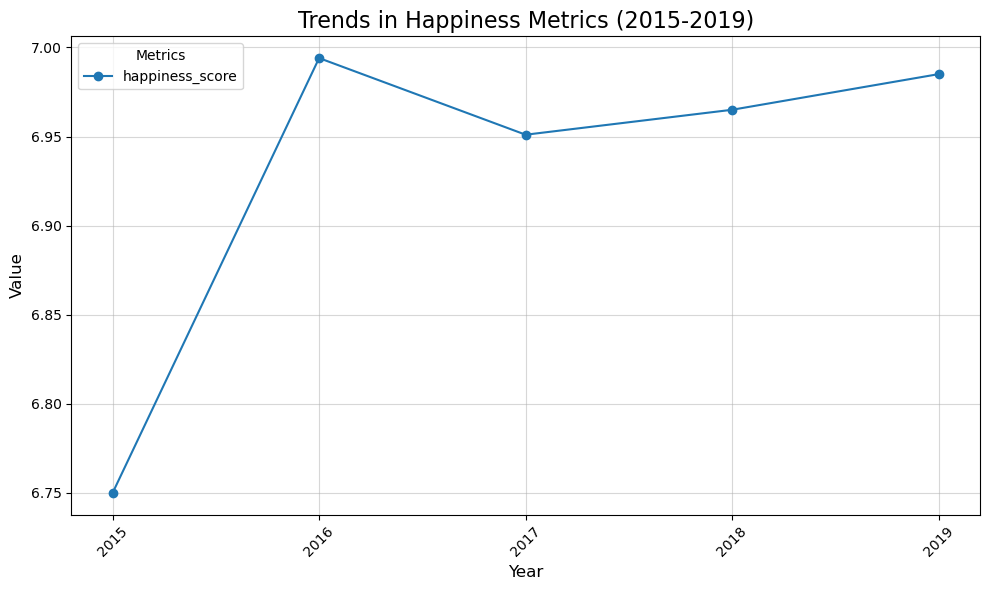

In [40]:
# Create the line chart
plt.figure(figsize=(10, 6))
plt.plot(df_country, marker='o', label="happiness_score")

# Add chart details
plt.title('Trends in Happiness Metrics (2015-2019)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.legend(title='Metrics', fontsize=10)
plt.grid(alpha=0.5)
plt.xticks(df_country.index, rotation=45)
plt.tight_layout()

# Display the chart
plt.show()


## 04 Time series analysis: decomposition

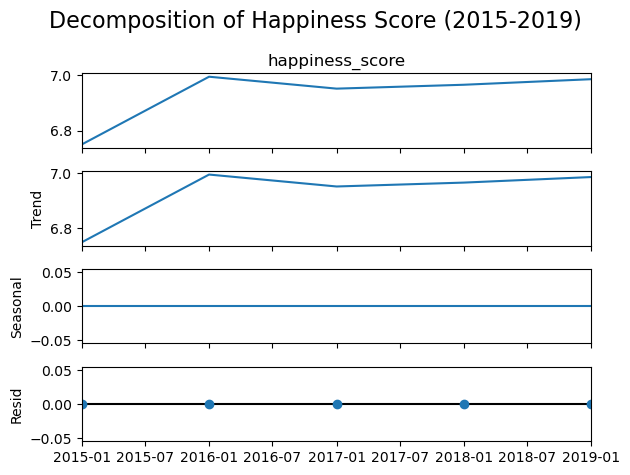

In [41]:
df_country.index = pd.to_datetime(df_country.index, format='%Y')

# Select the variable to decompose (e.g., happiness_score)
ts_data = df_country['happiness_score']

# Perform decomposition
decomposition = seasonal_decompose(ts_data, model='additive', period=1)  # Annual data, so period=1

# Plot the decomposition results
decomposition.plot()
plt.suptitle('Decomposition of Happiness Score (2015-2019)', fontsize=16)
plt.tight_layout()
plt.show()


### Key Insights
#### 1.	Stable Overall Trend:
##### While there are minor fluctuations (2016's rise, 2017's drop), the happiness score trend is relatively stable over the 2015-2019 period.
#### 2.	No Seasonal Influence:
###### The flat seasonal component confirms that there are no recurring yearly patterns affecting happiness scores.
#### 3.	Residuals:
##### The residuals are negligible, indicating no major anomalies or external shocks influencing the happiness scores.
##### Conclusion: The data reveals a consistent happiness trend with no seasonal or major external influences, indicating stability in the observed period

## 05 Testing for stationarity

In [42]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_country['happiness_score'])

Dickey-Fuller Stationarity test:
Test Statistic                -1.396901e+01
p-value                        4.379724e-26
Number of Lags Used            0.000000e+00
Number of Observations Used    4.000000e+00
Critical Value (1%)           -7.355441e+00
Critical Value (5%)           -4.474365e+00
Critical Value (10%)          -3.126933e+00
dtype: float64


### Observations:
#### test Statistic (-13.969): Much smaller than all critical values (-7.35 at 1%, -4.47 at 5%, -3.13 at 10%), indicating strong evidence against non-stationarity.
#### p-value (4.38e-26): Extremely small, confirming the null hypothesis of non-stationarity can be rejected.
##### Conclusion: The time series is stationary, meaning the mean, variance, and autocorrelations do not change over time.


## 06 Check for autocorrelations

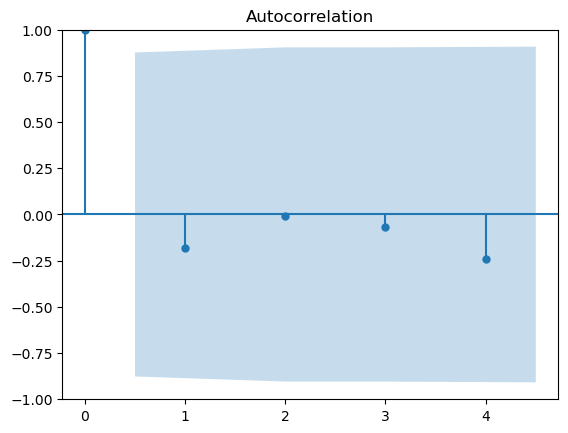

In [44]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df_country)
plt.show()